# Purpose:

2015-02-26 (Thursday)

Use newly discovered database excel files to generate a list of code-to-district maps to help us organize boxes for Richard to help sort out.

# Implementation:

## Imports:

In [94]:
# imports
import sys
import os
import re
import pandas as pd
import numpy as np

import seaborn as sns

In [102]:
%matplotlib inline

## File paths:

In [1]:
# define paths to files
source_dir = '/home/gus/Dropbox/uganda_data/tsetse_database/districts'

## Collect the files and create master dataframe

In [7]:
workbooks = []

In [13]:
for name in os.listdir(source_dir):
#     print os.path.splitext(name)
    if os.path.splitext(name)[-1].startswith('.xls'):
        workbooks.append(name)

In [16]:
workbooks[:5]

['Wakiso.xlsx',
 'Masindi.xlsx',
 'Kamwenge.xlsx',
 'Busia_yoosook.xls',
 'Apac.xlsx']

In [27]:
colsite_sheets = []

In [6]:
def load_xl_sheets(xl_path):
    dfs = {}
    
    xls = pd.ExcelFile(xl_path)
    
    for sheet in xls.sheet_names:
        if sheet.upper().startswith("COLSITE"):
            dfs[sheet] = xls.parse(sheetname=sheet, 
                                header=0, 
                                skiprows=None, skip_footer=0, 
                                index_col=None, parse_cols=None, 
                                parse_dates=False, date_parser=None, 
                                na_values=['NA'], 
                                thousands=None, chunksize=None, 
                                convert_float=False, 
                                has_index_names=False, converters=None)
    return dfs

In [28]:
for wkbk in workbooks:
    dfs = load_xl_sheets(os.path.join(source_dir, wkbk))
    
    for name, df in dfs.items():
        dfs[name]['source_file'] = wkbk
        colsite_sheets.append(dfs[name])
        
    
    

In [34]:
table = pd.concat(colsite_sheets)

## Pull out data for uganda and make the maps

In [51]:
uganda = table.query('country == "Uganda"')

In [76]:
letter_code = re.compile(u'^\D+', re.UNICODE)

def recode_id(df):

    recode_func = lambda x: letter_code.findall(x)[0]

    new_id = df.id.apply(recode_func)
    df.id = new_id

In [60]:
s = u'BB22'
letter_code.findall(s)

[u'BB']

In [80]:
ug_id_nnul = uganda[uganda.id.notnull()]
recode_id(ug_id_nnul)

In [82]:
ug_id_nnul.head()

,id,name,gaz_id,latitude,longitude,country,district,province,category,submitter,submission_date,curator,curation_date,public_notes,internal_notes,source_file
0,AP?,Apala,NaN,2.382780,33.045000,Uganda,Lira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
1,AP?,Apac,NaN,1.975600,32.538600,Uganda,Apac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
2,BB,Bulanga B,NaN,1.068104,33.777342,Uganda,Budaka,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
3,BB,Bulanga B Trap 20,NaN,1.072800,33.779530,Uganda,Budaka,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
4,BB,Bulanga B Trap 21,NaN,1.072500,33.779380,Uganda,Budaka,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx


In [83]:
pt1 = pd.pivot_table(ug_id_nnul,index=['district', 'id'],
                      values=['source_file'],
                      fill_value=0,
                      aggfunc=[len])
pt1

len
                       source_file
district           id             
Abwanget           TR           56
Apac               AP?          56
Arua               OM           56
Budaka             BB          616
                   KP          616
                   KW          560
Busia              BD          224
                   BU          392
                   OK          616
                   SI          224
Butaleja           BN          896
                   NA          224
Dokolo             DK           56
Dokolo/Kaberamaido UGT         728
Kabarole           KK           56
Kaberamaido        OT           56
Kalangala          SS           56
Kamwenge           MP           56
Kibaale            KB           56
Kumi               MK          952
Lira               AP?          56
                   DK          504
Masindi            MF          560
                   MS          728
Moyo               MY         1792
Mukono             BV          392
                   KL           56
Nakasongola        JN          560
Namutumba          NB           56
Oyam               OYa         336
Pallisa            BK         1008
                   KA          504
Soroti             BG          784
                   KY          504
                   OS           56
                   SR          168
Wakiso             KT           56

In [88]:
UGT = ug_id_nnul.query('id == "UGT"')
UGT.head()

,id,name,gaz_id,latitude,longitude,country,district,province,category,submitter,submission_date,curator,curation_date,public_notes,internal_notes,source_file
270,UGT,Atama,NaN,1.9081,33.1602,Uganda,Dokolo/Kaberamaido,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
271,UGT,Atama,NaN,1.9095,33.1605,Uganda,Dokolo/Kaberamaido,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
272,UGT,Atama,NaN,1.9079,33.1594,Uganda,Dokolo/Kaberamaido,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
273,UGT,Arachi Iguli,NaN,1.9354,33.1304,Uganda,Dokolo/Kaberamaido,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
274,UGT,Otolimoleo,NaN,1.9242,33.1560,Uganda,Dokolo/Kaberamaido,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx


In [91]:
print UGT.latitude.median(),UGT.longitude.median()

1.9242 33.156


In [92]:
AP = ug_id_nnul.query('id == "AP?"')
AP.head()

,id,name,gaz_id,latitude,longitude,country,district,province,category,submitter,submission_date,curator,curation_date,public_notes,internal_notes,source_file
0,AP?,Apala,NaN,2.38278,33.0450,Uganda,Lira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
1,AP?,Apac,NaN,1.97560,32.5386,Uganda,Apac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wakiso.xlsx
0,AP?,Apala,NaN,2.38278,33.0450,Uganda,Lira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masindi.xlsx
1,AP?,Apac,NaN,1.97560,32.5386,Uganda,Apac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masindi.xlsx
0,AP?,Apala,NaN,2.38278,33.0450,Uganda,Lira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kamwenge.xlsx


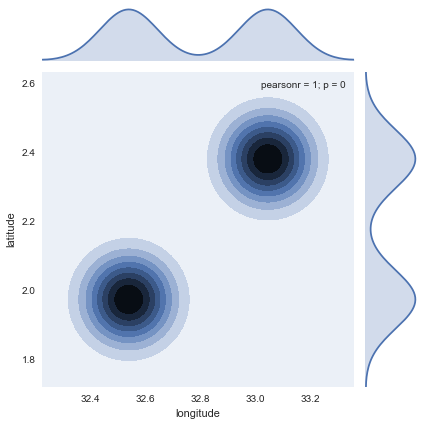

In [103]:
sns.color_palette("cubehelix", 8)
sns.jointplot("longitude", "latitude", AP, kind="kde", dropna=1);